In [15]:
from astropy.io import fits

In [16]:
import numpy as np
import matplotlib.pyplot as plt 

from astropy.stats import sigma_clipped_stats
%matplotlib inline

In [17]:
m3_fits = fits.open('Messier3.fits')
m3_fits.info()

Filename: Messier3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4108)   int16 (rescales to uint16)   


In [18]:
m3_header = m3_fits[0].header
m3_header

SIMPLE  =                    T / conform to FITS standard                       
BITPIX  =                   16 / unsigned short data                            
NAXIS   =                    2 / number of axes                                 
NAXIS1  =                 4096 / length of data axis                            
NAXIS2  =                 4108 / length of data axis                            
EXTEND  =                    T / this is FITS with extensions                   
HISTORY Created with RTS2 version 0.9.5 build on Apr 11 2020 00:33:30.          
CTIME   =           1586578832 / exposure start (seconds since 1.1.1970)        
USEC    =                  515 / exposure start micro seconds                   
JD      =     2458950.68092013 / Modified Julian Date                           
DATE-OBS= '2020-04-11T04:20:32.000' / start of exposure                         
EXPOSURE=                  30. / exposure length in seconds                     
EXPTIME =                  3

In [19]:
m3_header[3]

4096

In [20]:
m3_header.comments['EXPOSURE']

'exposure length in seconds'

In [21]:
m3_data = m3_fits[0].data

In [22]:
m3_data.shape, m3_data.dtype.name

((4108, 4096), 'uint16')

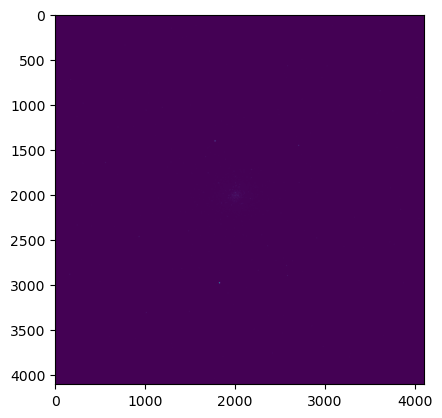

In [23]:
plt.imshow(m3_data)
plt.show()

In [24]:
mean, median, std = sigma_clipped_stats(m3_data)

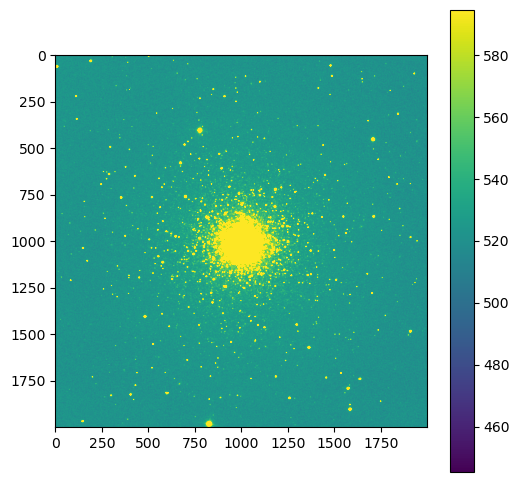

In [25]:
plt.figure(figsize=(6,6))
plt.imshow(m3_data[1000:3000,1000:3000], vmin = median - 5*std, vmax = median + 5*std, cmap='viridis')
plt.colorbar()
plt.show()

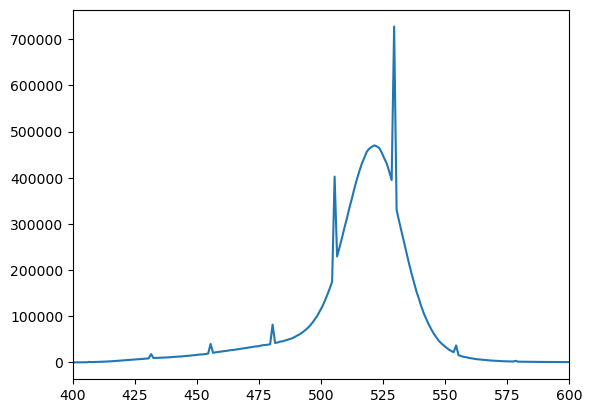

In [37]:
def get_background_hist(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten()
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

bins, num_pixels = get_background_hist(m3_data, np.min(m3_data[:,:]), np.max(m3_data[:,:]))
plt.plot(bins, num_pixels)
plt.xlim([400,600])
plt.show()

In [38]:
num_pixels_f = num_pixels
for i in range(0,400):
    if(num_pixels_f[i]>num_pixels_f[i-1] and num_pixels_f[i]>num_pixels_f[i+1]):
        num_pixels_f[i] = num_pixels_f[i+1]

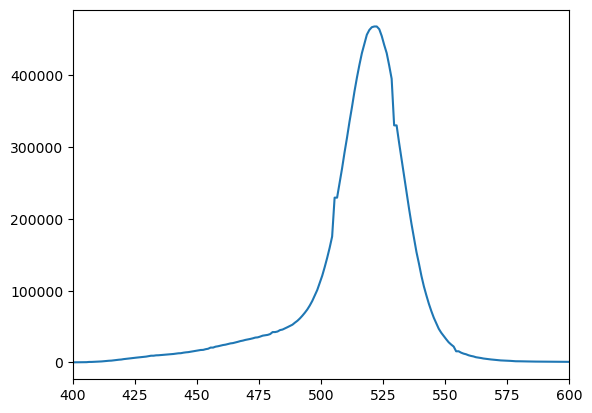

In [39]:
plt.plot(bins, num_pixels_f)
plt.xlim([400, 600])
plt.show()
